## Installation

In [ ]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-bkdm6jmb
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-bkdm6jmb
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=354bb14c23b979ed44b01c270e5bc36b80e224f11ae6169136ac554b042b1b76
  Stored in directory: /tmp/pip-ephem-wheel-cache-wplyg941/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


In [ ]:
# optional for mask post processing
!pip install opencv-python pycocotools matplotlib onnxruntime onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.6 MB/s eta 0:00:00


## Downloading the weights

In [ ]:
# vit-h
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2024-09-23 11:49:49--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.156.133.37, 108.156.133.64, 108.156.133.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.156.133.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G  82.6MB/s    in 22s     

2024-09-23 11:50:11 (110 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



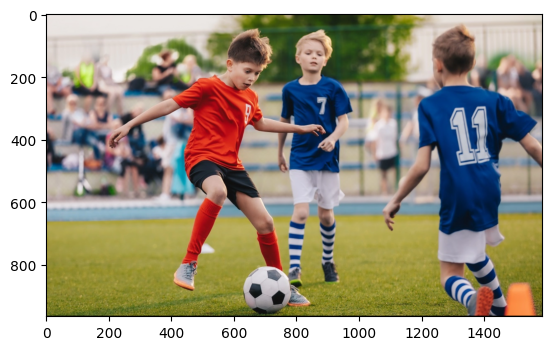

In [ ]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt

image = io.imread('/content/Screenshot 2024-09-23 172033.png')
plt.imshow(image)

In [ ]:
from segment_anything import SamPredictor, sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)
predictor.set_image(image)
masks, _, _ = predictor.predict('mask the middle person')

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


AssertionError: set_torch_image input must be BCHW with long side 1024.

In [ ]:
import torch
from segment_anything import SamPredictor, sam_model_registry
from PIL import Image
import numpy as np

# Load the image using PIL
image_path = "/content/Screenshot 2024-09-23 172033.png"
image = Image.open(image_path).convert("RGB")

# Convert the image to a NumPy array
image_np = np.array(image)

# Initialize SAM model
sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)

# Set the image to the predictor
predictor.set_image(image_np)  # Set as NumPy array

# Now predict the mask using prompt
masks, _, _ = predictor.predict('mask the middle person')

# Post-process or display masks
print(masks)

AssertionError: point_labels must be supplied if point_coords is supplied.

## Trying example

In [1]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

# !mkdir images
# !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/truck.jpg
# !wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/groceries.jpg

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.4.1+cu121
Torchvision version: 0.19.1+cu121
CUDA is available: True
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-oh9yjriv
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-oh9yjriv
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=610bb1c182cbb3ab40b649ddfcd40c617d4e96e057657254d42291e9ab7be5f6
  Stored in directory: /tmp/pip-ephem-wheel-cache-ciiv_89_/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything
--2024-09-24 16:10:43--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.59, 13.227.219.10, 

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [3]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [10]:
img_url = 'https://github.com/MdMonoar/try-SAM/blob/main/images/Screenshot%20from%202024-09-24%2022-17-52.png'
!wget https://github.com/MdMonoar/try-SAM/blob/main/images/Screenshot%20from%202024-09-24%2022-17-52.png?raw=true

--2024-09-24 16:30:26--  https://github.com/MdMonoar/try-SAM/blob/main/images/Screenshot%20from%202024-09-24%2022-17-52.png?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/MdMonoar/try-SAM/raw/refs/heads/main/images/Screenshot%20from%202024-09-24%2022-17-52.png [following]
--2024-09-24 16:30:26--  https://github.com/MdMonoar/try-SAM/raw/refs/heads/main/images/Screenshot%20from%202024-09-24%2022-17-52.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MdMonoar/try-SAM/refs/heads/main/images/Screenshot%20from%202024-09-24%2022-17-52.png [following]
--2024-09-24 16:30:26--  https://raw.githubusercontent.com/MdMonoar/try-SAM/refs/heads/main/images/Screenshot%20from%202024-09-24%2022-17-52.png
Resolving raw.githubusercontent.com (raw.githubu

In [11]:
image = cv2.imread('Screenshot from 2024-09-24 22-17-52.png?raw=true')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

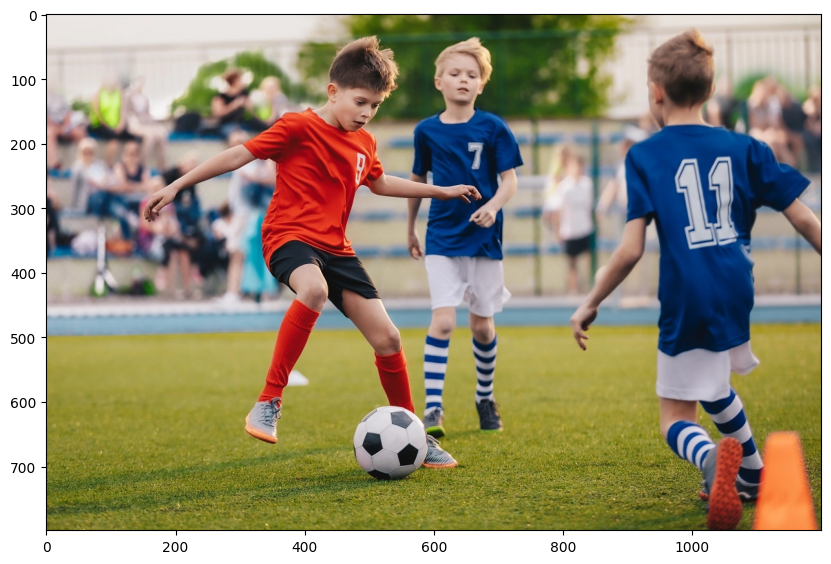

In [12]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

## Loading the model and weights

In [13]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [14]:
predictor.set_image(image)

In [18]:
input_point = np.array([[400, 300]])
input_label = np.array([1])

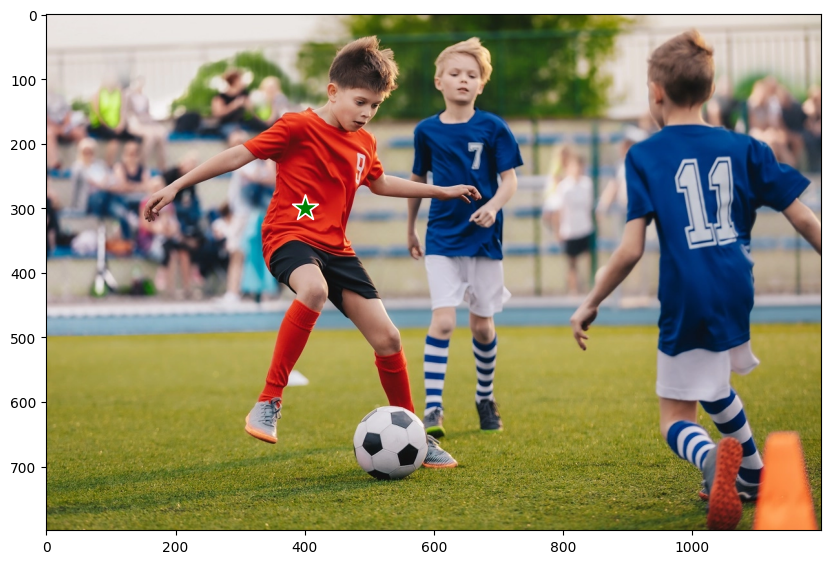

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

In [20]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

In [ ]:
masks.shape  # (number_of_masks) x H x W

(3, 965, 1586)

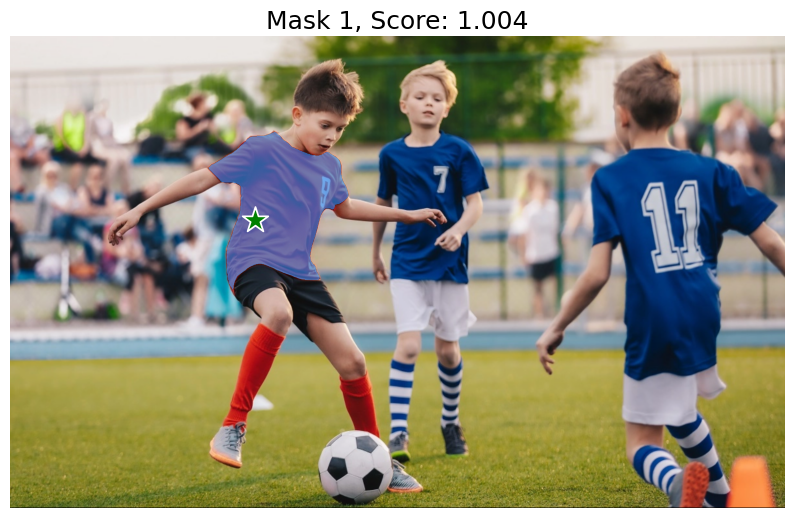

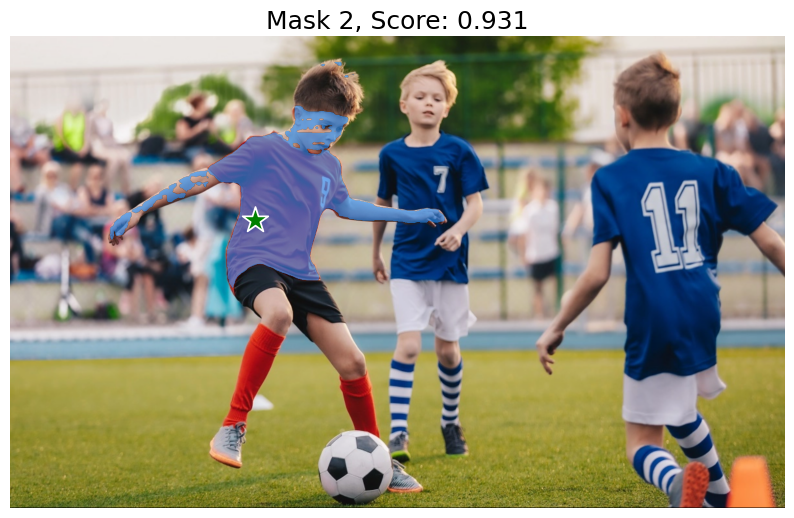

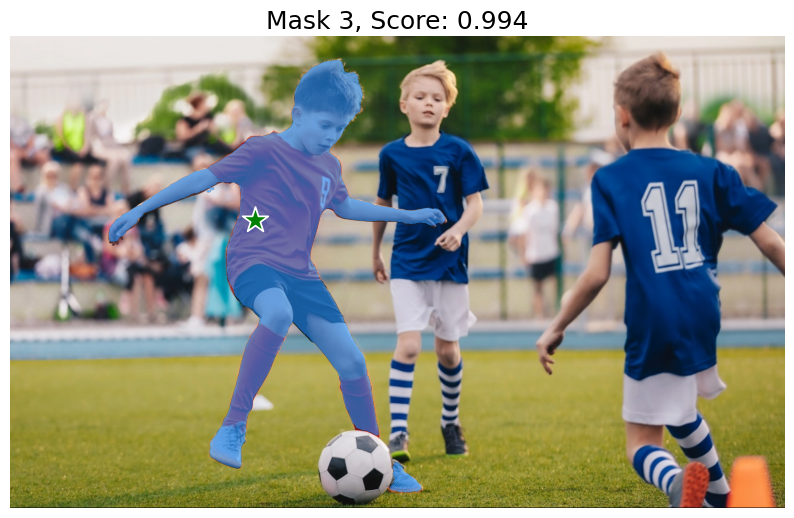

In [ ]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()

## Trying another point

In [ ]:
input_point = np.array([[850, 300]])
input_label = np.array([1])

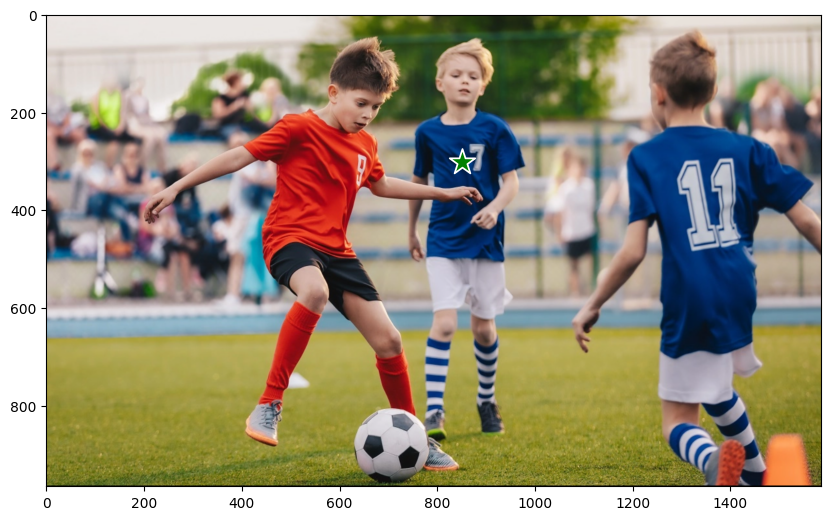

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

In [ ]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

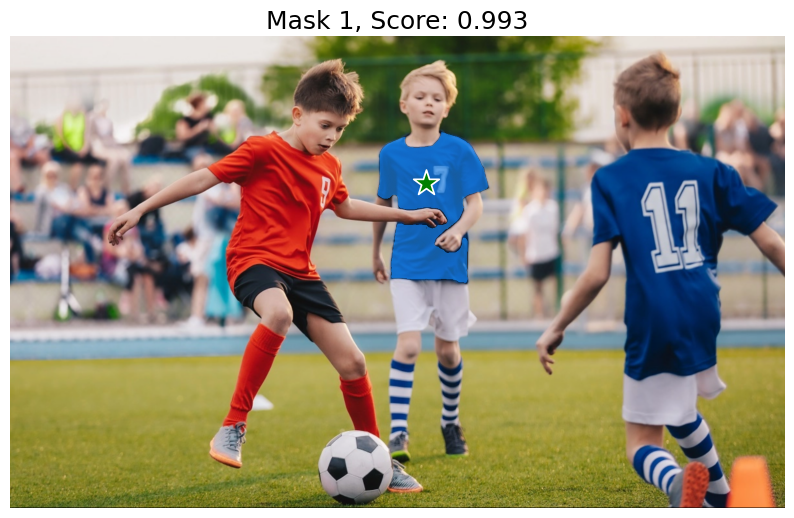

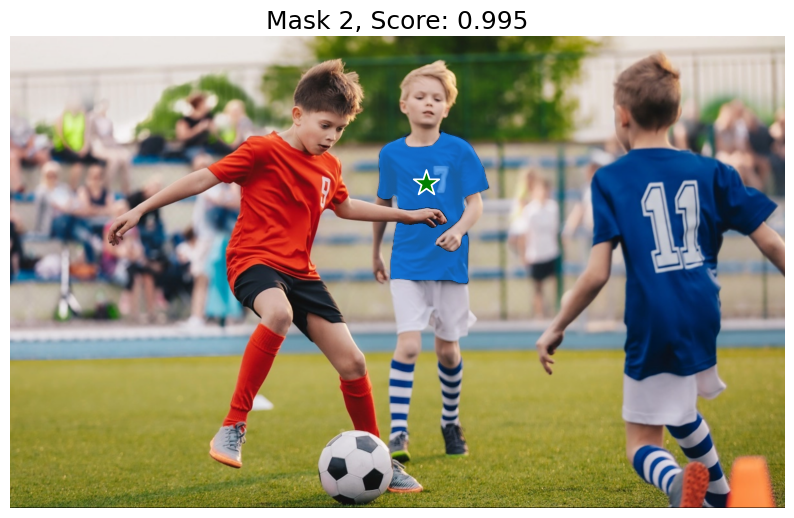

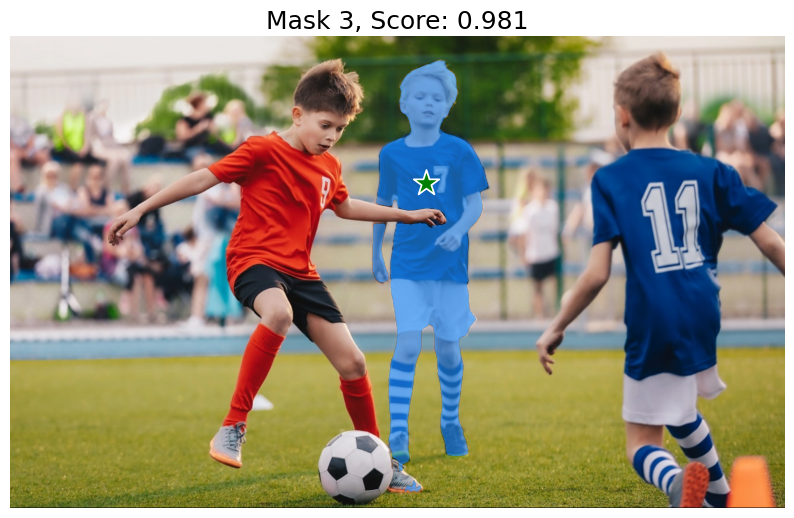

In [ ]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()

## Trying Something

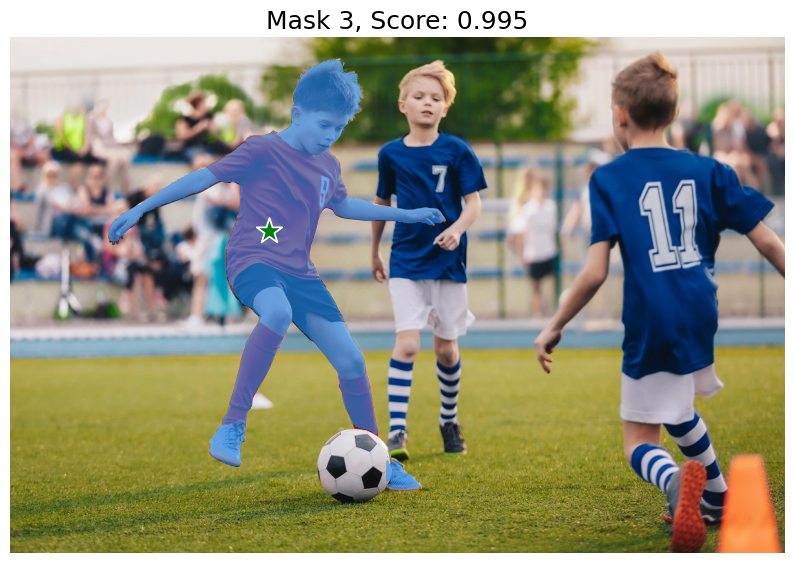

In [21]:
# Assuming masks and scores are lists of masks and their corresponding scores
last_index = len(masks) - 1  # Get the index of the last mask
mask = masks[last_index]
score = scores[last_index]

plt.figure(figsize=(10, 10))
plt.imshow(image)  # Show the original image
show_mask(mask, plt.gca())  # Show the last mask
show_points(input_point, input_label, plt.gca())  # Optionally show points if needed
plt.title(f"Mask {last_index + 1}, Score: {score:.3f}", fontsize=18)
plt.axis('off')
plt.show()

## Only showing mask

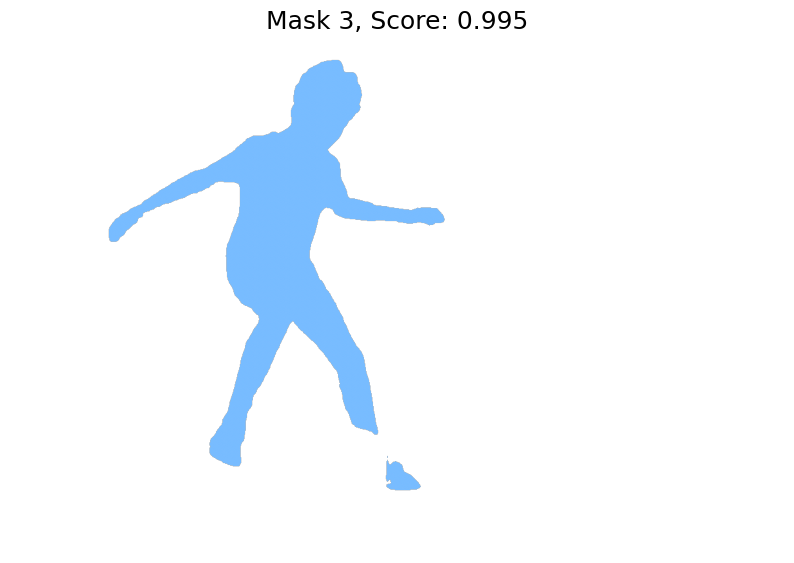

In [22]:
# Get the last mask and score
last_index = len(masks) - 1
mask = masks[last_index]
score = scores[last_index]

plt.figure(figsize=(10, 10))
show_mask(mask, plt.gca())  # Show only the last mask
plt.title(f"Mask {last_index + 1}, Score: {score:.3f}", fontsize=18)
plt.axis('off')
plt.show()
